<a href="https://colab.research.google.com/github/ChitteshKumar/udemy_deep_learning_tutorials/blob/main/LSTM%26GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TIME SERIES PREDICTION ANALYSIS


In [56]:
from tensorflow.keras.layers import Input, Dense, SimpleRNN, LSTM, GRU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

import numpy as np
import matplotlib.pyplot as plt

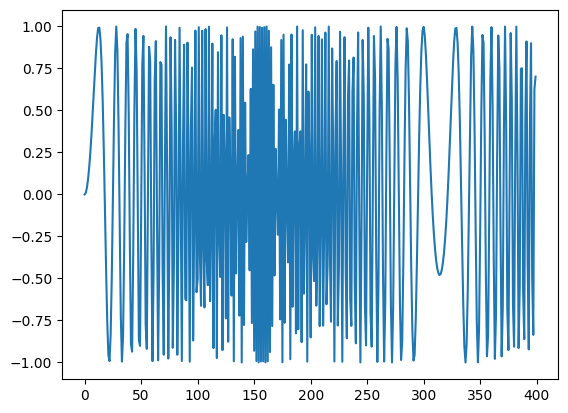

In [57]:
#original data
series = np.sin((0.1*np.arange(400))**2)
plt.plot(series)

In [58]:
#dataset
T = 10
D = 1
X = []
Y = []
for i in range(len(series)-T):
  x = series[i:i+T]
  X.append(x)
  y = series[i+T]
  Y.append(y)

X = np.array(X).reshape(-1,T) #NxT
Y = np.array(Y)
N = len(X)
print(X.shape)
print(Y.shape)


(390, 10)
(390,)


using Autoregressive Linear Model


In [59]:
input = Input(shape=(T,))
output = Dense(1)(input)
model = Model(input, output)
model.compile(loss = 'mse', optimizer=Adam(learning_rate = 0.01))
r = model.fit( X[:-N//2], Y[:-N//2], epochs = 80, validation_data=(X[-N//2:], Y[-N//2:]))

Epoch 1/80
7/7 [==============================] - 1s 31ms/step - loss: 1.8061 - val_loss: 1.2934
Epoch 2/80
7/7 [==============================] - 0s 9ms/step - loss: 1.5034 - val_loss: 1.1463
Epoch 3/80
7/7 [==============================] - 0s 10ms/step - loss: 1.2587 - val_loss: 1.0240
Epoch 4/80
7/7 [==============================] - 0s 7ms/step - loss: 1.0515 - val_loss: 0.9349
Epoch 5/80
7/7 [==============================] - 0s 9ms/step - loss: 0.8965 - val_loss: 0.8733
Epoch 6/80
7/7 [==============================] - 0s 7ms/step - loss: 0.7780 - val_loss: 0.8309
Epoch 7/80
7/7 [==============================] - 0s 9ms/step - loss: 0.6920 - val_loss: 0.7914
Epoch 8/80
7/7 [==============================] - 0s 9ms/step - loss: 0.6304 - val_loss: 0.7576
Epoch 9/80
7/7 [==============================] - 0s 7ms/step - loss: 0.5888 - val_loss: 0.7346
Epoch 10/80
7/7 [==============================] - 0s 7ms/step - loss: 0.5590 - val_loss: 0.7129
Epoch 11/80
7/7 [====================

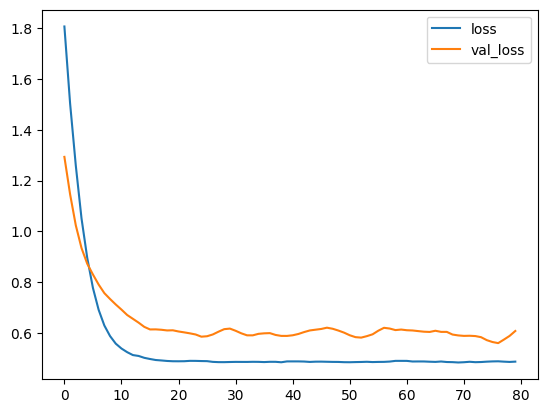

In [60]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

13/13 [==============================] - 0s 1ms/step
(390, 1)


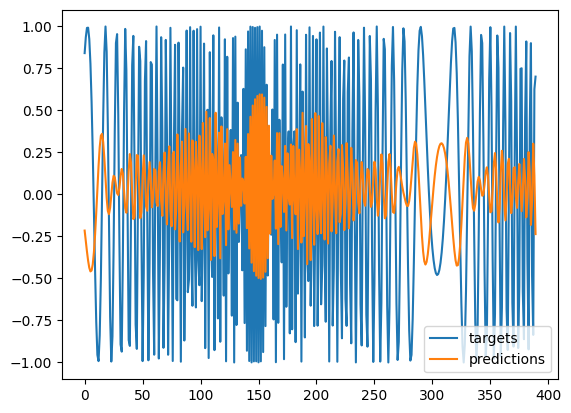

In [61]:
#one-step forecast
output = model.predict(X)
print(output.shape)
predictions = output[:, 0]
plt.plot(Y, label = 'targets')
plt.plot(predictions, label = 'predictions')
plt.legend()


1/1 [==============================] - 0s 21ms/step


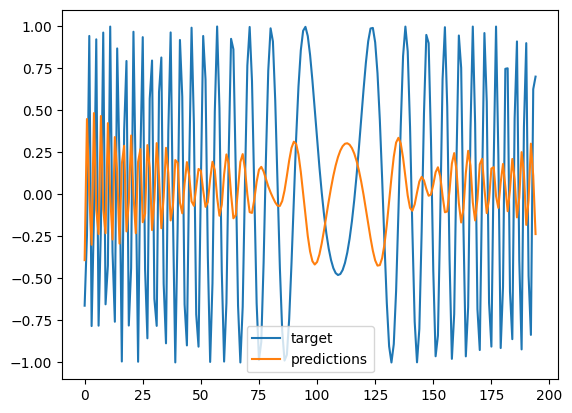

In [62]:
validation_target = Y[-N//2:]
validation_predictions = []
i = -N//2
while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1,-1))[0,0]
  i += 1
  validation_predictions.append(p)

plt.plot(validation_target, label='target')
plt.plot(validation_predictions, label='predictions')
plt.legend()

1/1 [==============================] - 0s 30ms/step


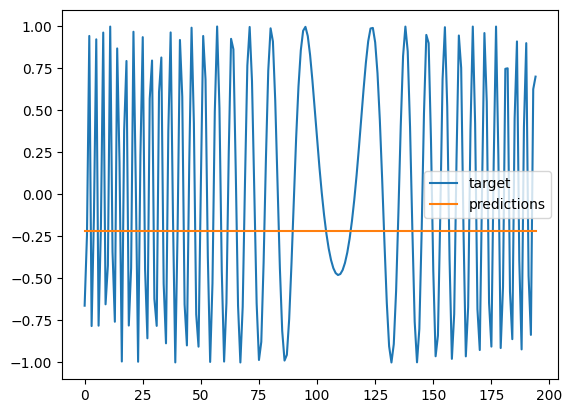

In [63]:
#Multi-step forecast
validation_target = Y[-N//2:]
validation_predictions = []
last_x = X[-N//2]
while len(validation_target) > len(validation_predictions):
  p = model.predict(X[i].reshape(1,-1))[0,0]
  validation_predictions.append(p)
  last_x = np.roll(last_x, -1)
  last_x = p

plt.plot(validation_target, label='target')
plt.plot(validation_predictions, label='predictions')
plt.legend()


using RNN

In [64]:
#reshaping
X = X.reshape(-1,T,1)

intput = Input(shape=(T,D))
output = SimpleRNN(10)(intput)
output = Dense(1)(output)
model = Model(intput, output)
model.compile(loss='mse', optimizer=Adam(learning_rate = 0.05))
r = model.fit(X[:-N//2],Y[:-N//2], batch_size=32, epochs=200, validation_data=(X[-N//2:],Y[-N//2:]))

Epoch 1/200
7/7 [==============================] - 2s 72ms/step - loss: 0.5926 - val_loss: 0.5575
Epoch 2/200
7/7 [==============================] - 0s 15ms/step - loss: 0.5159 - val_loss: 0.5814
Epoch 3/200
7/7 [==============================] - 0s 22ms/step - loss: 0.5228 - val_loss: 0.5293
Epoch 4/200
7/7 [==============================] - 0s 12ms/step - loss: 0.4479 - val_loss: 0.5349
Epoch 5/200
7/7 [==============================] - 0s 11ms/step - loss: 0.4082 - val_loss: 0.5775
Epoch 6/200
7/7 [==============================] - 0s 10ms/step - loss: 0.3733 - val_loss: 0.4836
Epoch 7/200
7/7 [==============================] - 0s 12ms/step - loss: 0.3240 - val_loss: 0.4007
Epoch 8/200
7/7 [==============================] - 0s 10ms/step - loss: 0.2520 - val_loss: 0.3281
Epoch 9/200
7/7 [==============================] - 0s 12ms/step - loss: 0.2353 - val_loss: 0.2895
Epoch 10/200
7/7 [==============================] - 0s 11ms/step - loss: 0.1811 - val_loss: 0.3145
Epoch 11/200
7/7 [=

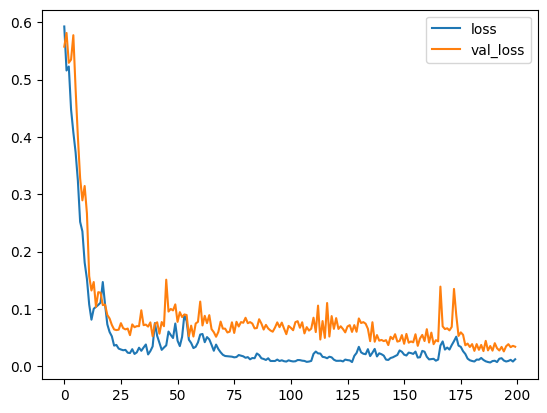

In [65]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

13/13 [==============================] - 0s 2ms/step
(390, 1)


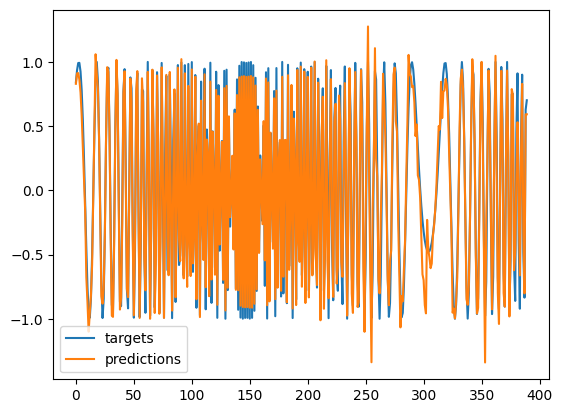

In [66]:
#one-step forecast
output = model.predict(X)
print(output.shape)
predictions = output[:, 0]
plt.plot(Y, label = 'targets')
plt.plot(predictions, label = 'predictions')
plt.legend()

1/1 [==============================] - 0s 22ms/step


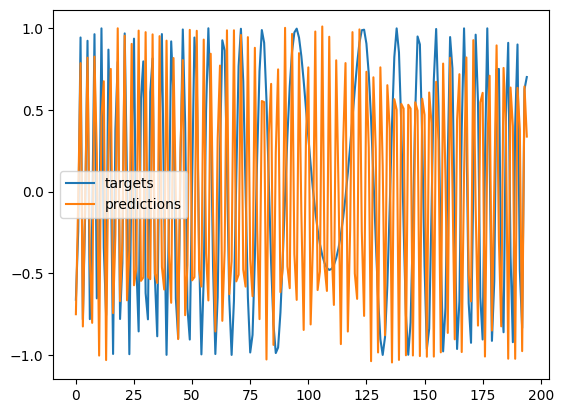

In [67]:
#multi-step forecast
forecast=[]
input = X[-N//2]
while len(forecast) < len(Y[-N//2:]):
  f = model.predict(input.reshape(1,T,1))[0,0]
  forecast.append(f)
  input = np.roll(input,-1)
  input[-1] = f

plt.plot(Y[-N//2:], label='targets' )
plt.plot(forecast, label='predictions' )
plt.legend()

using LSTM

Epoch 1/200
7/7 [==============================] - 4s 133ms/step - loss: 0.5041 - val_loss: 0.5438
Epoch 2/200
7/7 [==============================] - 0s 21ms/step - loss: 0.4804 - val_loss: 0.5968
Epoch 3/200
7/7 [==============================] - 0s 23ms/step - loss: 0.4041 - val_loss: 0.7133
Epoch 4/200
7/7 [==============================] - 0s 24ms/step - loss: 0.3593 - val_loss: 0.6024
Epoch 5/200
7/7 [==============================] - 0s 13ms/step - loss: 0.3482 - val_loss: 0.4973
Epoch 6/200
7/7 [==============================] - 0s 13ms/step - loss: 0.2861 - val_loss: 0.4987
Epoch 7/200
7/7 [==============================] - 0s 12ms/step - loss: 0.2121 - val_loss: 0.2818
Epoch 8/200
7/7 [==============================] - 0s 13ms/step - loss: 0.1729 - val_loss: 0.2119
Epoch 9/200
7/7 [==============================] - 0s 12ms/step - loss: 0.1492 - val_loss: 0.1760
Epoch 10/200
7/7 [==============================] - 0s 13ms/step - loss: 0.0865 - val_loss: 0.1117
Epoch 11/200
7/7 [

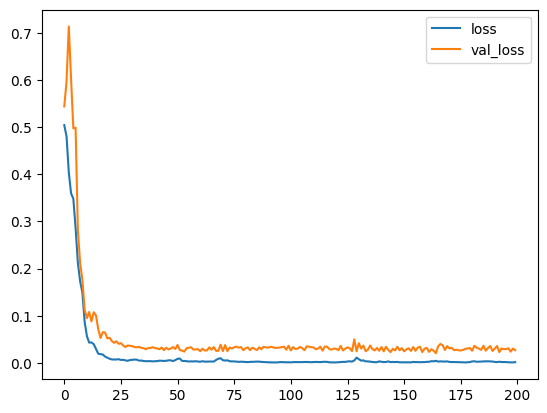

In [69]:
#reshaping
X = X.reshape(-1,T,1)

intput = Input(shape=(T,D))
output = LSTM(10)(intput)
output = Dense(1)(output)
model = Model(intput, output)
model.compile(loss='mse', optimizer=Adam(learning_rate = 0.05))
r = model.fit(X[:-N//2],Y[:-N//2], batch_size=32, epochs=200, validation_data=(X[-N//2:],Y[-N//2:]))

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

13/13 [==============================] - 0s 2ms/step


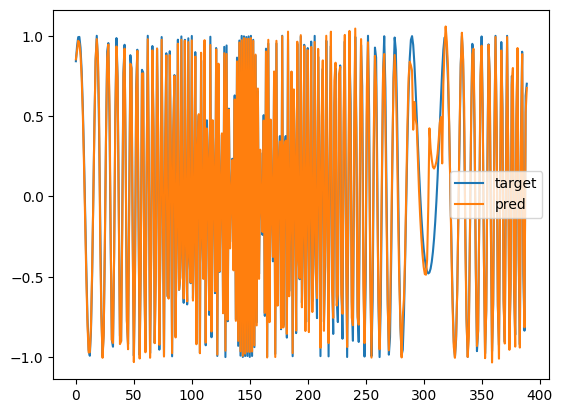

In [71]:
#one-step forecast using true targets
outputs = model.predict(X)
predictions = outputs[:,0]

plt.plot(Y, label='target')
plt.plot(predictions, label='pred')
plt.legend()

1/1 [==============================] - 0s 21ms/step


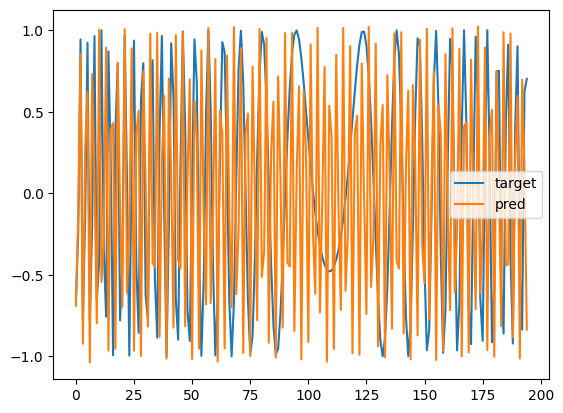

In [77]:
#multi-step forecast
forecast = []
input = X[-N//2]

while len(forecast) < len(Y[-N//2:]):
  f = model.predict(input.reshape(1,T,1))[0,0]
  forecast.append(f)

  input = np.roll(input,-1)
  input[-1] = f

plt.plot(Y[-N//2:], label='target')
plt.plot(forecast, label = 'pred')
plt.legend()
plt.show()